<a href="https://colab.research.google.com/github/abdulwasaeee/modern-computer-vision-course/blob/main/TranslationsandRotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)


# **Transformations - Translations and Rotations**

In this lesson we'll learn to:
1. Perform Image Translations
2. Rotations with getRotationMatrix2D
3. Rotations with Transpose
4. Flipping Images

In [4]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!gdown "https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q"


!unzip -qq images.zip

Downloading...
From (original): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q
From (redirected): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q&confirm=t&uuid=2f35f80f-3039-47a6-b2a8-b7ada7eecedb
To: /content/images.zip
100% 29.6M/29.6M [00:00<00:00, 89.7MB/s]


### **Translations**

This an affine transform that simply shifts the position of an image. (left or right).

We use cv2.warpAffine to implement these transformations.

```cv2.warpAffine(image, T, (width, height))```

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/warp.png)

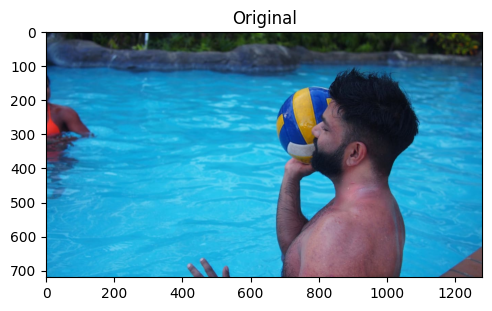

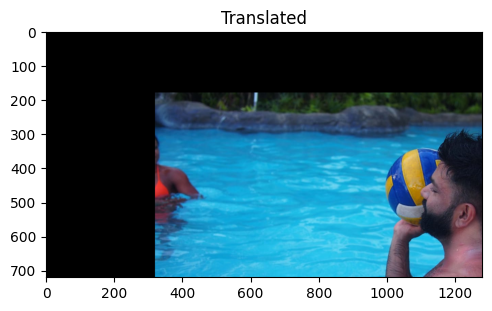

In [5]:
# Load our image
image = cv2.imread('images/Volleyball.jpeg')
imshow("Original", image)

# Store height and width of the image
height, width = image.shape[:2]

# We shift it by quarter of the height and width
quarter_height, quarter_width = height/4, width/4

# Our Translation
#       | 1 0 Tx |
#  T  = | 0 1 Ty |

# T is our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])

# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
imshow("Translated", img_translation)

In [6]:
# What does T look like
print(T)

print(height, width )

[[  1.   0. 320.]
 [  0.   1. 180.]]
720 1280


### **Rotations**

```cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)```

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/rotation.png)


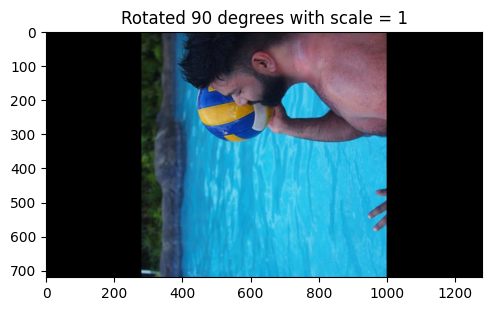

In [13]:
# Load our image
image = cv2.imread('images/Volleyball.jpeg')
height, width = image.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)

# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 1", rotated_image)

[[ 3.061617e-17  5.000000e-01  4.600000e+02]
 [-5.000000e-01  3.061617e-17  6.800000e+02]]


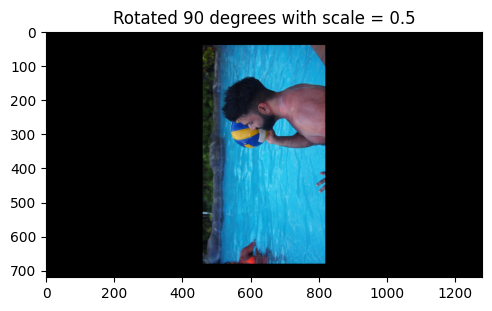

In [8]:
# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
print(rotation_matrix)
# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 0.5", rotated_image)

Notice all the black space surrounding the image.

We could now crop the image as we can calculate it's new size (we haven't learned cropping yet!).

### **Rotations with cv2.transpose** (less flexible)




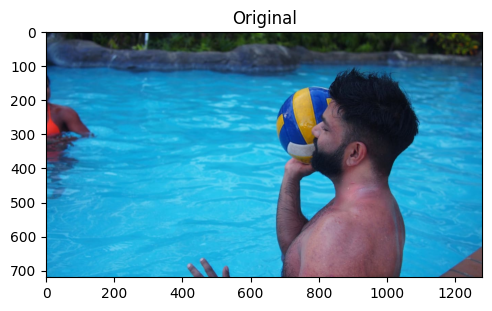

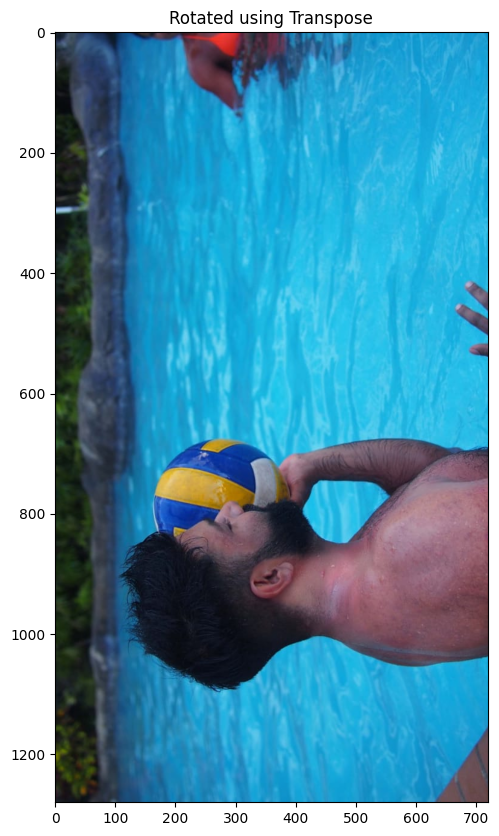

In [9]:
rotated_image = cv2.transpose(image)
imshow("Original", image)
imshow("Rotated using Transpose", rotated_image)

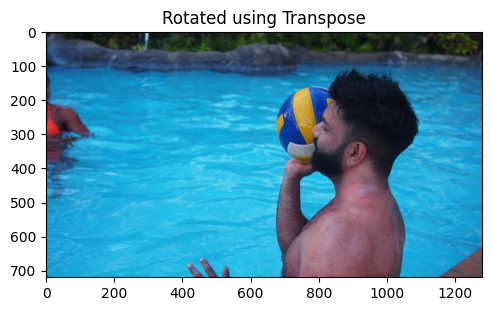

In [10]:
rotated_image = cv2.transpose(image)
rotated_image = cv2.transpose(rotated_image)

imshow("Rotated using Transpose", rotated_image)

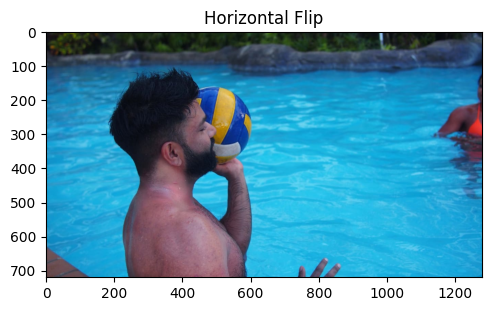

In [15]:
# Let's now to a horizontal flip.
flipped = cv2.flip(image, 1)
imshow("Horizontal Flip", flipped)